In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df_market_data)

In [6]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Copy the crypto names from the original data
crypto_names = df_market_data.index.copy()

# Set the coinid column as index
df_scaled.index.name = 'coin_id'

# Display sample data
print("Sample of Scaled Data:")
print(df_scaled.head())

Sample of Scaled Data:
              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash         

---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [8]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit the model to the scaled data
    kmeans.fit(scaled_data)
    # Append the inertia to the list of inertias
    inertia_values.append(kmeans.inertia_)


In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

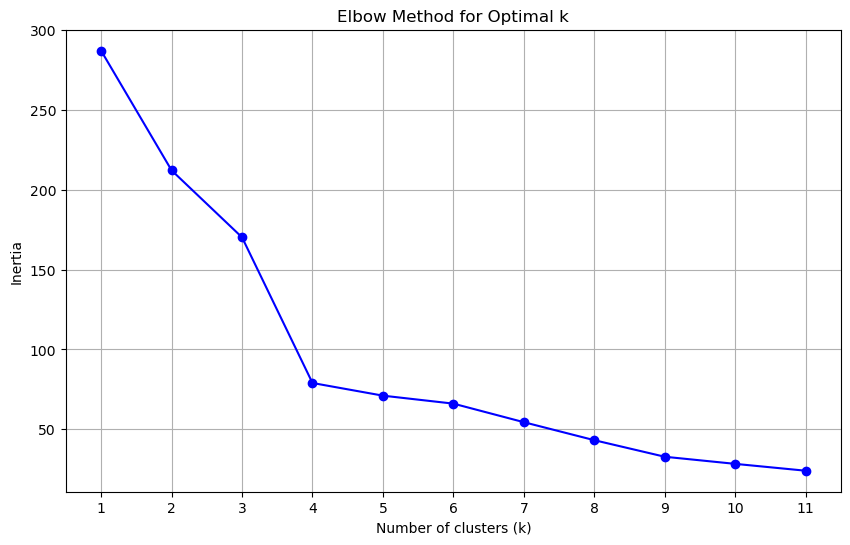

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Based on the elbow point at 4, the best inertia is around the 80ish mark

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42)

In [12]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_predictions = kmeans.predict(scaled_data)

# Print the resulting array of cluster values.
print(cluster_predictions)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [14]:
# Create a copy of the DataFrame
df_clusters = df_market_data.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
df_clusters['cluster'] = cluster_predictions

# Display sample data
print(df_clusters.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                           1.08388                     7.60278   
ethereum                          0.22392                    10.38134   
tether                           -0.21173                     0.04935   
ripple                           -0.37819                    -0.60926   
bitcoin-cash                      2.90585                    17.09717   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                           6.57509                      7.67258   
ethereum                          4.80849                      0.13169   
tether                            0.00640                     -0.04237   
ripple                            2.24984                      0.23455   
bitcoin-cash                     14.75334   

In [16]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

# Create a scatter plot using hvPlot
scatter_plot = df_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by='cluster',
    hover_cols=['name']
)

# Display the scatter plot
hvplot.show(scatter_plot)

Launching server at http://localhost:51519


---

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(scaled_data)

# View the first five rows of the DataFrame. 
df_pca = pd.DataFrame(
    data=pca_data,
    columns=['PC1', 'PC2', 'PC3'],
    index=df_market_data.index
)
print(df_pca.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [19]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each principal component: {explained_variance}")
print(f"Total explained variance: {explained_variance.sum()}")

Explained variance by each principal component: [0.3719856  0.34700813 0.17603793]
Total explained variance: 0.8950316570309841


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total explained variance is 0.8950316570309841

In [20]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data
df_pca = pd.DataFrame(
    data=pca_data,
    columns=['PC1', 'PC2', 'PC3'],
    index=df_market_data.index
)

# Copy the crypto names from the original data
df_pca['crypto_name'] = df_market_data.index

# Set the coinid column as index
df_pca.index.name = 'coin_id'

# Display sample data
print(df_pca.head())

                   PC1       PC2       PC3   crypto_name
coin_id                                                 
bitcoin      -0.600667  0.842760  0.461595       bitcoin
ethereum     -0.458261  0.458466  0.952877      ethereum
tether       -0.433070 -0.168126 -0.641752        tether
ripple       -0.471835 -0.222660 -0.479053        ripple
bitcoin-cash -1.157800  2.041209  1.859715  bitcoin-cash


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [22]:
# Create an empty list to store the inertia values
inertia_values_2 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit the model to the data using df_pca
    kmeans.fit(df_pca[['PC1', 'PC2', 'PC3']])
    # Append the model.inertia_ to the inertia list
    inertia_values_2.append(kmeans.inertia_)


In [23]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_2 = {
    'k': k_values,
    'inertia': inertia_values_2
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_2 = pd.DataFrame(elbow_data_2)

In [24]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot_2 = df_elbow_2.hvplot.line(
    x='k', 
    y='inertia', 
    title='Elbow Curve', 
    xlabel='Number of Clusters (k)', 
    ylabel='Inertia', 
    width=800, 
    height=400
)

elbow_plot_2

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** It appears to be 4 again.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** the value is lower, around 50 instead of the 80 mark

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k
best_k_2 = 4
kmeans_2 = KMeans(n_clusters=best_k_2, random_state=42)

In [26]:
# Fit the K-Means model using the PCA data
kmeans_2.fit(df_pca[['PC1', 'PC2', 'PC3']])

KMeans(n_clusters=4, random_state=42)

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data
df_pca['cluster'] = kmeans_2.labels_
# Print the resulting array of cluster values.
print("Cluster labels:", kmeans_2.labels_)

Cluster labels: [0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [28]:
# Create a copy of the DataFrame with the PCA data
df_clustered_2 = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_clustered_2['cluster'] = kmeans_2.labels_

# Display sample data
print(df_clustered_2.head())


                   PC1       PC2       PC3   crypto_name  cluster
coin_id                                                          
bitcoin      -0.600667  0.842760  0.461595       bitcoin        0
ethereum     -0.458261  0.458466  0.952877      ethereum        0
tether       -0.433070 -0.168126 -0.641752        tether        2
ripple       -0.471835 -0.222660 -0.479053        ripple        2
bitcoin-cash -1.157800  2.041209  1.859715  bitcoin-cash        0


In [29]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot_2 = df_clustered_2.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    by='cluster',
    hover_cols=['crypto_name'],
    title=f'K-Means Clustering with {best_k_2} clusters',
    width=800,
    height=500
)

scatter_plot_2

:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,crypto_name)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [30]:
# Composite plot to contrast the Elbow curves
elbow_plot = df_elbow.hvplot.line(
    x='k', 
    y='inertia', 
    title='Elbow Curve without PCA', 
    xlabel='Number of Clusters (k)', 
    ylabel='Inertia',
    width=400,
    height=300
)
elbow_plot_2 = df_elbow_2.hvplot.line(
    x='k', 
    y='inertia', 
    title='Elbow Curve with PCA', 
    xlabel='Number of Clusters (k)', 
    ylabel='Inertia',
    width=400,
    height=300
)

In [31]:
# Composite plot to contrast the clusters
composite_elbow_plot = (elbow_plot + elbow_plot_2).cols(2)

composite_elbow_plot

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** You end with lower results on the Y value